In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(columns=["User ID","Gender"],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [5]:
x.shape

(400, 2)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_Scaled = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,test_size=0.2,random_state=40)
x_train.shape, x_test.shape

((320, 2), (80, 2))

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

#### Gradient Descent in TF

* By default keras uses Mini Batch GD (if batch size =1 => Stochastic GD(weights are update for each data points for every epochs)), if batch_size = no fo data points its Batch GD (weights are updated only after each epoch for entier datapoints at once)

In [24]:
history = model.fit(x_train,y_train,epochs=20,batch_size=1)

Epoch 1/20
320/320 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.6500
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8125
Epoch 3/20
320/320 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8375
Epoch 4/20
320/320 [==============================] - 1s 2ms/step - loss: 0.3124 - accuracy: 0.8500
Epoch 5/20
320/320 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.8562
Epoch 6/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2942 - accuracy: 0.8562
Epoch 7/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.8656
Epoch 8/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.8781
Epoch 9/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2865 - accuracy: 0.8844
Epoch 10/20
320/320 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.8875

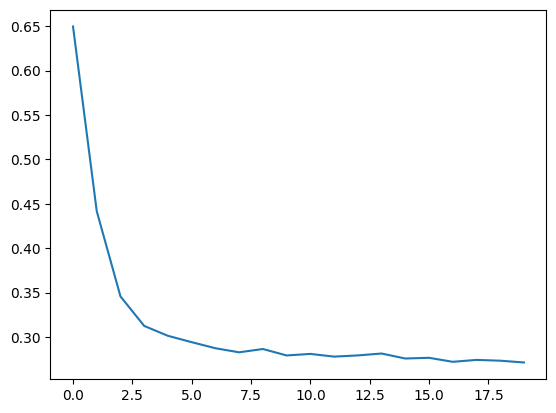

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])